# Predicting Revenue Based on Time Spent Online

Created by **Tetiana Yatsiuk**  
✉️ *Email:*  tet.yatsiuk@gmail.com  
🔗 [*LinkedIn*](www.linkedin.com/in/tetianayatsiuk)   , 💻 [*GitHub*](https://github.com/YatsiukTetiana)

# 🗂️ Project Summary

**Objectives**
- Model the relationship between **time spent online** and **customer purchase value**.
- Develop a **linear regression model** to predict revenue based on user engagement.
- Assess model performance using multiple **error metrics** and identify the most relevant one for business insights.

**Tools Used**
- Python (pandas, numpy, seaborn, matplotlib);
- Python sklearn:
   - `LinearRegression`
   - `train_test_split`
   - `metrics` (`mean_absolute_error`, `mean_squared_error`, `root_mean_squared_error`, `r2_score`)
   - `cross_val_score`
- Markdown.

# 1. 🔢 Initial Data

Creating a dataframe from the input data:

In [1]:
import pandas as pd

data = {
    "time_on_site": [
        29.1, 24.7, 17.6, 2.8, 45.4, 31.7, 48.2, 40.5, 15.7, 30.6, 25.2, 24.3,
        42.7, 25.6, 45.0, 24.2, 24.2, 47.4, 34.5, 47.1, 30.4, 26.6, 9.5, 3.2,
        30.4, 32.4, 19.8, 41.2, 40.1, 29.0, 42.0, 29.4, 10.8, 15.0, 20.5, 15.1,
        17.8, 37.4, 24.9, 43.3, 7.4, 15.4, 23.3, 41.0, 35.6, 41.4, 18.9, 40.2,
        33.0, 3.0
    ],
    "purchase_value": [
        396.1, 318.7, 112.3, 163.4, 624.1, 378.0, 689.4, 551.3, 234.3, 413.3,
        334.9, 351.1, 512.8, 265.4, 636.4, 356.7, 251.6, 620.6, 398.5, 551.6,
        493.9, 330.9, 174.2, 7.0, 368.3, 335.4, 308.5, 567.0, 535.9, 311.0,
        584.1, 428.4, 107.3, 221.1, 264.5, 242.2, 316.1, 498.3, 323.8, 495.6,
        115.9, 132.3, 238.3, 553.2, 307.4, 494.6, 234.6, 497.5, 424.1, 164.1
    ]
}

df = pd.DataFrame(data)

Dataframe preview

In [2]:
df.head()

,time_on_site,purchase_value
0,29.1,396.1
1,24.7,318.7
2,17.6,112.3
3,2.8,163.4
4,45.4,624.1


# 2. 📈 Scatterplot and Linear Regression

Building a scatter plot for input data, assessing the type of dependence.

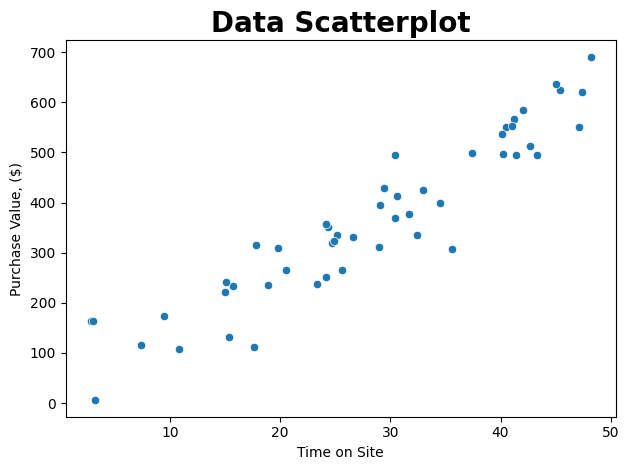

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.scatterplot(data = df, x = df['time_on_site'], y = df['purchase_value'])

plt.title("Data Scatterplot", weight = "bold", fontsize = 20)
plt.xlabel("Time on Site")
plt.ylabel("Purchase Value, ($)")
plt.tight_layout()

plt.show()

The relationship is similar to a linear one. Drawing the line on the scatterplot to highlight the linear dependance:

<Figure size 640x480 with 0 Axes>

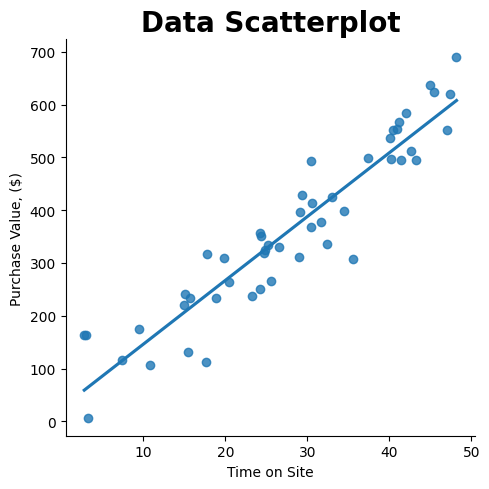

In [8]:
# Regression Line

plt.figure()

sns.lmplot(data = df, x = 'time_on_site', y = 'purchase_value', ci = None)
plt.title("Data Scatterplot", weight = "bold", fontsize = 20)
plt.xlabel("Time on Site")
plt.ylabel("Purchase Value, ($)")
plt.tight_layout()

plt.show()

Creating a linear regression model and plotting a regression line on the scatterplot:

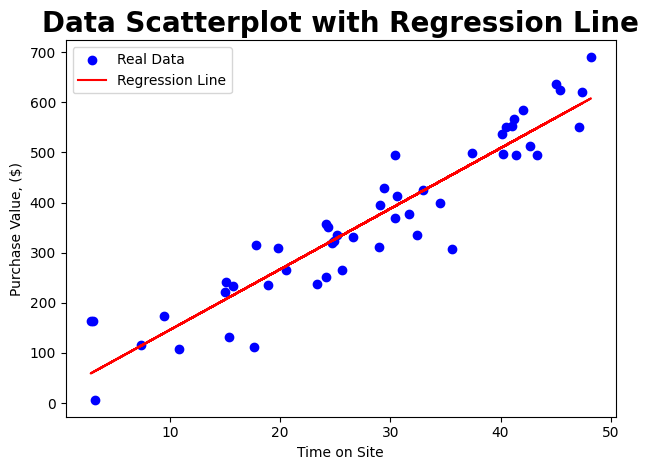

In [7]:
# Regression Model

from sklearn.linear_model import LinearRegression

# Data for model
X = df[['time_on_site']]
y = df['purchase_value']

# Model traiing
model = LinearRegression()
model.fit(X, y)

# Prediction
y_pred = model.predict(X)

# Visualization
plt.scatter(X, y, color = "blue", label = "Real Data")
plt.plot(X, y_pred, color = "red", label = "Regression Line")

plt.title("Data Scatterplot with Regression Line", weight = "bold", fontsize = 20)
plt.xlabel("Time on Site")
plt.ylabel("Purchase Value, ($)")
plt.tight_layout()
plt.legend()

plt.show()

In [10]:
# Coefficients of a linear regression model

print(f"Model Coefficients:\n w_0: {model.intercept_}\n w_1:{model.coef_}")

Model Coefficients:
 w_0: 25.33830657160871
 w_1:[12.08193996]


# 3. ✂️ Training and Test Data

Splitting the dataset into training and test data. Test data contains 30% of the general data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

print("Train data:\n", y_train.index)
print("Test data:\n", y_test.index)

Train data:
 Index([ 3, 41, 30, 15, 20, 43, 38, 44, 39, 10, 49, 25, 33, 36,  2, 27, 34, 35,
        8, 19, 29, 12,  5,  0, 28,  4, 40, 13,  9, 48, 23,  6, 17, 11, 31],
      dtype='int64')
Test data:
 Index([37, 14, 21, 32, 22, 1, 26, 46, 42, 47, 16, 24, 7, 45, 18], dtype='int64')


# 4. 🧠 Model Training

Training a linear model on training data and prediction on test data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# 5. 📊 Calculating MAE, MSE, RMSE та $R^2$ (Test Data)

Metric calculation to evaluate the quality of predictions on a test dataset.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 37.45947343426997
MSE: 1812.4240202659041
RMSE: 42.57257356874146
R2: 0.9141191309626138


While evaluating the model on the test sample, an $R^2$ of `0.91` was obtained, which is a good result. The model has high accuracy. However, it would be more reliable to estimate the relevant metrics using cross-validation.

# 6. 🔁  Calculating MAE, MSE, RMSE та $R^2$ (Cross-Validation)

Metric calculation for assessing the quality of predictions using cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model_cross = LinearRegression()

In [ ]:
mae_scores = cross_val_score(model_cross, X, y, cv = 5, scoring = "neg_mean_absolute_error") # MAE
mse_scores = cross_val_score(model_cross, X, y, cv = 5, scoring = "neg_mean_squared_error") # MSE
rmse_scores = cross_val_score(model_cross, X, y, cv = 5, scoring = "neg_root_mean_squared_error") # RMSE
r2_scores = cross_val_score(model_cross, X, y, cv = 5, scoring = "r2") # R^2

In [ ]:
print("MAE:\nCross-validation scores:", mae_scores)
print("Mean cross-validation score:", mae_scores.mean())
print("\nMSE:\nCross-validation scores:", mse_scores)
print("Mean cross-validation score:", mse_scores.mean())
print("\nRMSE:\nCross-validation scores:", rmse_scores)
print("Mean cross-validation score:", rmse_scores.mean())
print("\nR^2:\nCross-validation scores:", r2_scores)
print("Mean cross-validation score:", r2_scores.mean())

MAE:
Cross-validation scores: [-51.37332088 -41.63502431 -49.58701539 -36.62543402 -53.37410804]
Mean cross-validation score: -46.518980525709935

MSE:
Cross-validation scores: [-4159.91249159 -2173.77419555 -3128.12631659 -1878.90591036
 -5062.81339149]
Mean cross-validation score: -3280.7064611159817

RMSE:
Cross-validation scores: [-64.4973836  -46.62375141 -55.92965507 -43.34634829 -71.15344961]
Mean cross-validation score: -56.31011759793522

R^2:
Cross-validation scores: [0.87353564 0.87995781 0.87713793 0.9062386  0.79112581]
Mean cross-validation score: 0.8655991582416138


- The cross-validation $R^2$ is 0.9, which confirms the high quality of the model.
- The mean absolute error (MAE) is 46.5 monetary units, which is the average error of the model. This also indicates its good accuracy.

# 7. 🧾 Conclusion

In [ ]:
print("Metrics for Test Data Model:")
print(f"MAE: {mae},\nMSE: {mse},\nRMSE: {rmse},\nR^2: {r2}")

print("\nMetrics for Cross-Validation Model:")
print(f"MAE: {mae_scores.mean()},\nMSE: {mse_scores.mean()},\nRMSE: {rmse_scores.mean()},\nR^2: {r2_scores.mean()}")

Metrics for Test Data Model:
MAE: 37.45947343426997,
MSE: 1812.4240202659041,
RMSE: 42.57257356874146,
R^2: 0.9141191309626138

Metrics for Cross-Validation Model:
MAE: -46.518980525709935,
MSE: -3280.7064611159817,
RMSE: -56.31011759793522,
R^2: 0.8655991582416138


- According to the results, the model based on test data has better metrics values (MAE, MSE, RMSE, $R^2$).

- As MSE and RMSE are suitable for cases where it is important to reduce large errors, in this case they are key for comparing models.
